<a href="https://colab.research.google.com/github/melinnicri/EjercicioML/blob/main/cluster_cam_pal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ubicación de camiones y palas en los clusters (0 al 3):

In [1]:
# Importar librerías
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# para eliminar warnings en python
import warnings
warnings.simplefilter('ignore')

In [2]:
# Abrir archivo
# Lee el archivo CSV
archivo_csv = '/content/drive/MyDrive/camiones_eficiencia.csv'

In [3]:
# Dataframe
df = pd.read_csv(archivo_csv)

In [4]:
df

,date,truck,loader,eficiencia_camion,eficiencia_pala,tonelaje_por_paladas,eficiencia_distancia
0,2023-01-01,CAEX56,PH06,0.139,0.951,99.894,1.043
1,2023-01-01,CAEX64,PH48,0.182,0.897,105.558,0.963
2,2023-01-01,CAEX41,PH06,0.154,0.878,113.510,0.964
3,2023-01-01,CAEX41,PH06,0.141,1.126,97.612,0.973
4,2023-01-01,CAEX71,PH06,0.144,2.277,112.352,0.942
...,...,...,...,...,...,...,...
356703,2024-05-24,CAEX22,PH58,0.162,1.001,106.776,2.923
356704,2024-05-24,CAEX30,PH48,0.150,0.998,68.592,1.243
356705,2024-05-24,CAEX37,PH58,0.174,1.194,106.653,1.054
356706,2024-05-24,CAEX08,PH55,0.172,0.933,98.897,1.004


In [5]:

# Crear un DataFrame con las columnas seleccionadas
df_seleccionado = df[['date', 'truck', 'loader', 'eficiencia_camion', 'eficiencia_pala', 'tonelaje_por_paladas', 'eficiencia_distancia']]

# Establecer 'date' como el índice del DataFrame
df_seleccionado.set_index('date', inplace=True)


In [6]:

# Convertir las variables categóricas en códigos numéricos
df_seleccionado['truck'] = df_seleccionado['truck'].astype('category').cat.codes
df_seleccionado['loader'] = df_seleccionado['loader'].astype('category').cat.codes

# Seleccionar las variables independientes
X = df_seleccionado[['eficiencia_camion', 'tonelaje_por_paladas', 'eficiencia_distancia']]

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


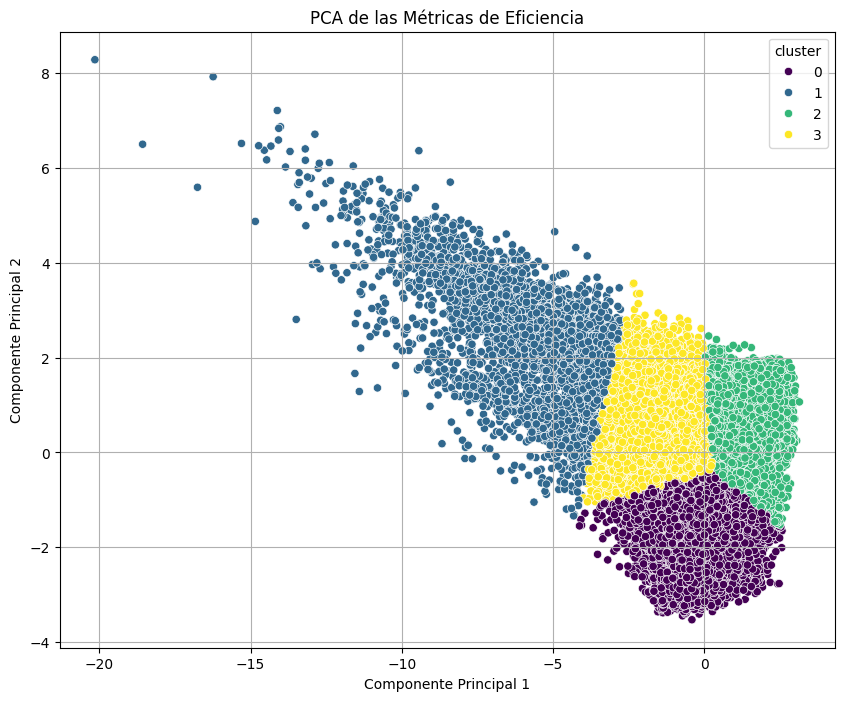

In [7]:
# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Aplicar K-Means en los componentes principales
kmeans = KMeans(n_clusters=4, random_state=0)
df_pca['cluster'] = kmeans.fit_predict(pca_result)

# Asegurarse de añadir la columna 'cluster' al DataFrame original
df_seleccionado['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar los componentes principales con los clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='viridis')
plt.title('PCA de las Métricas de Eficiencia')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
# Guardar el gráfico
plt.savefig('grafpca.png')
plt.show()

In [8]:
# Añadir columnas de medias dentro de cada clúster utilizando transform
df_seleccionado['media_eficiencia_camion'] = df_seleccionado.groupby('cluster')['eficiencia_camion'].transform('mean').round(3)
df_seleccionado['media_eficiencia_pala'] = df_seleccionado.groupby('cluster')['eficiencia_pala'].transform('mean').round(3)
df_seleccionado['media_tonelaje_por_paladas'] = df_seleccionado.groupby('cluster')['tonelaje_por_paladas'].transform('mean').round(3)
df_seleccionado['media_eficiencia_distancia'] = df_seleccionado.groupby('cluster')['eficiencia_distancia'].transform('mean').round(3)

df_seleccionado

,truck,loader,eficiencia_camion,eficiencia_pala,tonelaje_por_paladas,eficiencia_distancia,cluster,media_eficiencia_camion,media_eficiencia_pala,media_tonelaje_por_paladas,media_eficiencia_distancia
date,,,,,,,,,,,
2023-01-01,26,0,0.139,0.951,99.894,1.043,3,0.118,1.170,104.659,1.008
2023-01-01,31,1,0.182,0.897,105.558,0.963,1,0.218,1.171,104.336,0.957
2023-01-01,16,0,0.154,0.878,113.510,0.964,3,0.118,1.170,104.659,1.008
2023-01-01,16,0,0.141,1.126,97.612,0.973,3,0.118,1.170,104.659,1.008
2023-01-01,34,0,0.144,2.277,112.352,0.942,3,0.118,1.170,104.659,1.008
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-24,7,3,0.162,1.001,106.776,2.923,3,0.118,1.170,104.659,1.008
2024-05-24,11,1,0.150,0.998,68.592,1.243,0,0.150,1.057,79.058,0.991
2024-05-24,14,3,0.174,1.194,106.653,1.054,1,0.218,1.171,104.336,0.957


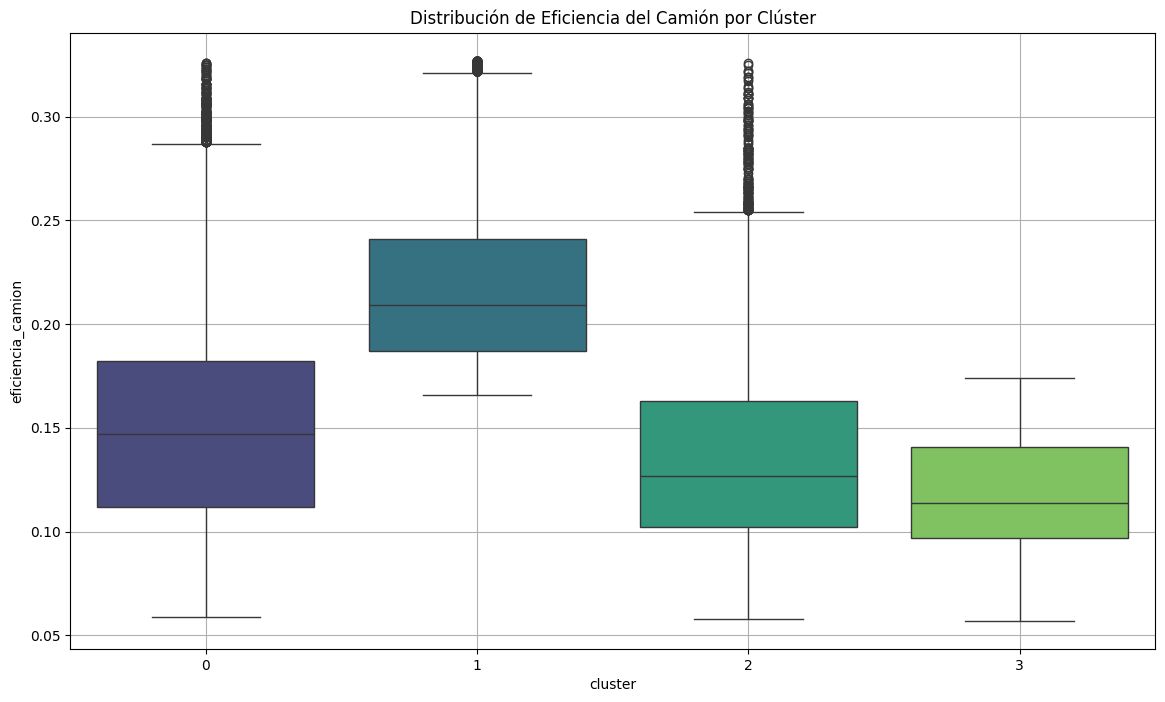

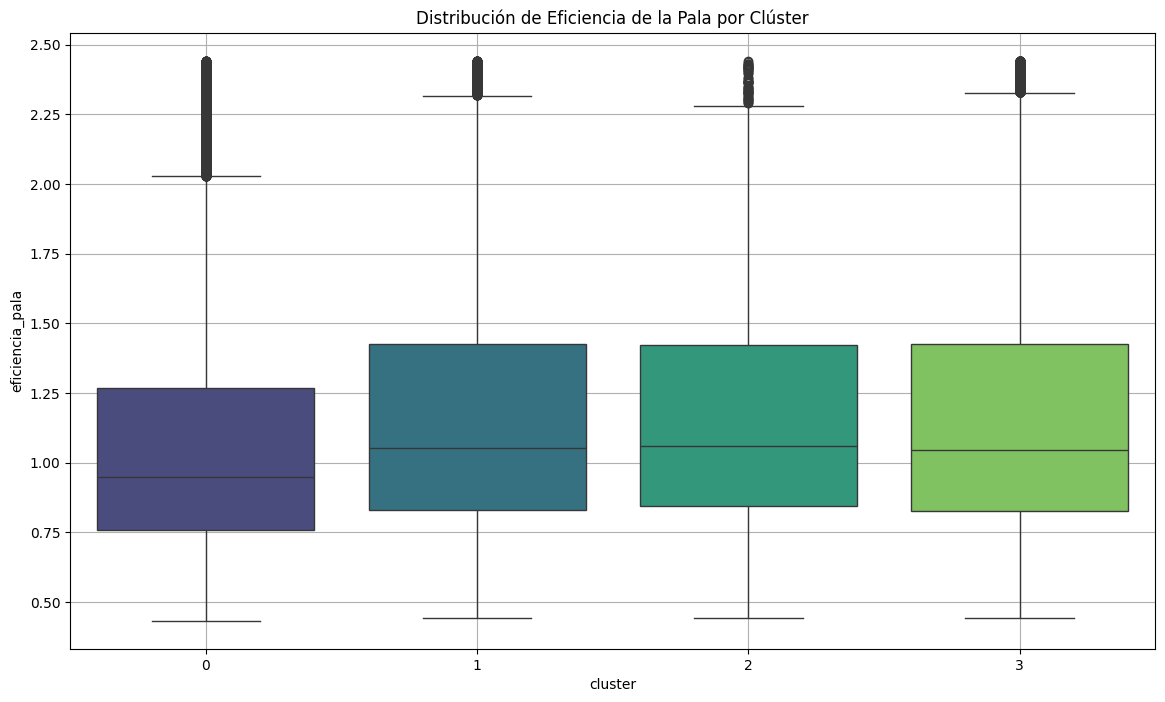

In [9]:
# Visualizar las características de los clústeres
plt.figure(figsize=(14, 8))
sns.boxplot(x='cluster', y='eficiencia_camion', data=df_seleccionado, palette='viridis')
plt.title('Distribución de Eficiencia del Camión por Clúster')
plt.grid(True)
# Guardar el gráfico
plt.savefig('cluster_camion.png')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='cluster', y='eficiencia_pala', data=df_seleccionado, palette='viridis')
plt.title('Distribución de Eficiencia de la Pala por Clúster')
plt.grid(True)
# Guardar el gráfico
plt.savefig('cluster_pala.png')
plt.show()

In [10]:
# Filtrar datos para cada clúster
cluster_0 = df_seleccionado[df_seleccionado['cluster'] == 0]
cluster_1 = df_seleccionado[df_seleccionado['cluster'] == 1]
cluster_2 = df_seleccionado[df_seleccionado['cluster'] == 2]
cluster_3 = df_seleccionado[df_seleccionado['cluster'] == 3]

In [17]:
# Restablecer el índice para asegurarse de que 'date' está como columna
cluster_0_reset = cluster_0.reset_index()
cluster_1_reset = cluster_1.reset_index()
cluster_2_reset = cluster_2.reset_index()
cluster_3_reset = cluster_3.reset_index()

In [18]:
# Mostrar las columnas de cada clúster
print("Camiones y Palas en el Clúster 0:")
print(cluster_0_reset.head())

print("\nCamiones y Palas en el Clúster 1:")
print(cluster_1_reset.head())

print("\nCamiones y Palas en el Clúster 2:")
print(cluster_2_reset.head())

print("\nCamiones y Palas en el Clúster 3:")
print(cluster_3_reset.head())


Camiones y Palas en el Clúster 0:
         date  truck  loader  eficiencia_camion  eficiencia_pala  \
0  2023-01-01     20       0              0.133            1.139   
1  2023-01-01     21       0              0.173            1.158   
2  2023-01-01     38       1              0.097            1.701   
3  2023-01-01     41       1              0.146            0.909   
4  2023-01-01     13       0              0.140            1.070   

   tonelaje_por_paladas  eficiencia_distancia  cluster  \
0                78.573                 0.986        0   
1                83.084                 0.978        0   
2                76.957                 0.535        0   
3                72.048                 1.040        0   
4                83.226                 0.945        0   

   media_eficiencia_camion  media_eficiencia_pala  media_tonelaje_por_paladas  \
0                     0.15                  1.057                      79.058   
1                     0.15                  1.

In [11]:
# Mostrar los camiones y las palas para cada clúster
print("Camiones y Palas en el Clúster 0:")
print(cluster_0)

print("\nCamiones y Palas en el Clúster 1:")
print(cluster_1)

print("\nCamiones y Palas en el Clúster 2:")
print(cluster_2)

print("\nCamiones y Palas en el Clúster 3:")
print(cluster_3)


Camiones y Palas en el Clúster 0:
            truck  loader  eficiencia_camion  eficiencia_pala  \
date                                                            
2023-01-01     20       0              0.133            1.139   
2023-01-01     21       0              0.173            1.158   
2023-01-01     38       1              0.097            1.701   
2023-01-01     41       1              0.146            0.909   
2023-01-01     13       0              0.140            1.070   
...           ...     ...                ...              ...   
2024-05-24      2       2              0.137            0.649   
2024-05-24     12       2              0.169            1.556   
2024-05-24     18       2              0.154            1.688   
2024-05-24     21       2              0.181            1.156   
2024-05-24     11       1              0.150            0.998   

            tonelaje_por_paladas  eficiencia_distancia  cluster  \
date                                                 

In [12]:
# Ver información de DF cluster 0
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91596 entries, 2023-01-01 to 2024-05-24
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   truck                       91596 non-null  int8   
 1   loader                      91596 non-null  int8   
 2   eficiencia_camion           91596 non-null  float64
 3   eficiencia_pala             91596 non-null  float64
 4   tonelaje_por_paladas        91596 non-null  float64
 5   eficiencia_distancia        91596 non-null  float64
 6   cluster                     91596 non-null  int32  
 7   media_eficiencia_camion     91596 non-null  float64
 8   media_eficiencia_pala       91596 non-null  float64
 9   media_tonelaje_por_paladas  91596 non-null  float64
 10  media_eficiencia_distancia  91596 non-null  float64
dtypes: float64(8), int32(1), int8(2)
memory usage: 6.8+ MB


In [13]:
# Ver información de DF cluster 1
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101205 entries, 2023-01-01 to 2024-05-24
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   truck                       101205 non-null  int8   
 1   loader                      101205 non-null  int8   
 2   eficiencia_camion           101205 non-null  float64
 3   eficiencia_pala             101205 non-null  float64
 4   tonelaje_por_paladas        101205 non-null  float64
 5   eficiencia_distancia        101205 non-null  float64
 6   cluster                     101205 non-null  int32  
 7   media_eficiencia_camion     101205 non-null  float64
 8   media_eficiencia_pala       101205 non-null  float64
 9   media_tonelaje_por_paladas  101205 non-null  float64
 10  media_eficiencia_distancia  101205 non-null  float64
dtypes: float64(8), int32(1), int8(2)
memory usage: 7.5+ MB


In [14]:
# Ver información de DF cluster 2
cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4241 entries, 2023-01-01 to 2024-05-24
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   truck                       4241 non-null   int8   
 1   loader                      4241 non-null   int8   
 2   eficiencia_camion           4241 non-null   float64
 3   eficiencia_pala             4241 non-null   float64
 4   tonelaje_por_paladas        4241 non-null   float64
 5   eficiencia_distancia        4241 non-null   float64
 6   cluster                     4241 non-null   int32  
 7   media_eficiencia_camion     4241 non-null   float64
 8   media_eficiencia_pala       4241 non-null   float64
 9   media_tonelaje_por_paladas  4241 non-null   float64
 10  media_eficiencia_distancia  4241 non-null   float64
dtypes: float64(8), int32(1), int8(2)
memory usage: 323.0+ KB


In [15]:
# Ver información de DF cluster 3
cluster_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159666 entries, 2023-01-01 to 2024-05-24
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   truck                       159666 non-null  int8   
 1   loader                      159666 non-null  int8   
 2   eficiencia_camion           159666 non-null  float64
 3   eficiencia_pala             159666 non-null  float64
 4   tonelaje_por_paladas        159666 non-null  float64
 5   eficiencia_distancia        159666 non-null  float64
 6   cluster                     159666 non-null  int32  
 7   media_eficiencia_camion     159666 non-null  float64
 8   media_eficiencia_pala       159666 non-null  float64
 9   media_tonelaje_por_paladas  159666 non-null  float64
 10  media_eficiencia_distancia  159666 non-null  float64
dtypes: float64(8), int32(1), int8(2)
memory usage: 11.9+ MB


A pesar de la denominación del tipo de dato de las variables, en PowerBI se tuvo un problema de compatibilidad, lo cual trató los datos de tipo Int, se hicieron todos los intentos para dejarlos Float (no me resultó XD)

In [19]:
# Convertir la columna 'date' a tipo fecha
cluster_0_reset['date'] = pd.to_datetime(cluster_0_reset['date'])

# Convertir columnas a entero
cluster_0_reset['truck'] = cluster_0_reset['truck'].astype(int)
cluster_0_reset['loader'] = cluster_0_reset['loader'].astype(int)
cluster_0_reset['cluster'] = cluster_0_reset['cluster'].astype(int)

# Convertir columnas a flotante
columnas_flotantes = [
    'eficiencia_camion', 'eficiencia_pala', 'tonelaje_por_paladas', 'eficiencia_distancia',
    'media_eficiencia_camion', 'media_eficiencia_pala', 'media_tonelaje_por_paladas', 'media_eficiencia_distancia'
]

for columna in columnas_flotantes:
    cluster_0_reset[columna] = cluster_0_reset[columna].astype(float)

# Verificar los tipos de datos
print(cluster_0_reset.dtypes)


date                          datetime64[ns]
truck                                  int64
loader                                 int64
eficiencia_camion                    float64
eficiencia_pala                      float64
tonelaje_por_paladas                 float64
eficiencia_distancia                 float64
cluster                                int64
media_eficiencia_camion              float64
media_eficiencia_pala                float64
media_tonelaje_por_paladas           float64
media_eficiencia_distancia           float64
dtype: object


In [20]:
# Convertir la columna 'date' a tipo fecha
cluster_1_reset['date'] = pd.to_datetime(cluster_1_reset['date'])

# Convertir columnas a entero
cluster_1_reset['truck'] = cluster_1_reset['truck'].astype(int)
cluster_1_reset['loader'] = cluster_1_reset['loader'].astype(int)
cluster_1_reset['cluster'] = cluster_1_reset['cluster'].astype(int)

# Convertir columnas a flotante
columnas_flotantes = [
    'eficiencia_camion', 'eficiencia_pala', 'tonelaje_por_paladas', 'eficiencia_distancia',
    'media_eficiencia_camion', 'media_eficiencia_pala', 'media_tonelaje_por_paladas', 'media_eficiencia_distancia'
]

for columna in columnas_flotantes:
    cluster_1_reset[columna] = cluster_1_reset[columna].astype(float)

# Verificar los tipos de datos
print(cluster_1_reset.dtypes)


date                          datetime64[ns]
truck                                  int64
loader                                 int64
eficiencia_camion                    float64
eficiencia_pala                      float64
tonelaje_por_paladas                 float64
eficiencia_distancia                 float64
cluster                                int64
media_eficiencia_camion              float64
media_eficiencia_pala                float64
media_tonelaje_por_paladas           float64
media_eficiencia_distancia           float64
dtype: object


In [21]:
# Convertir la columna 'date' a tipo fecha
cluster_2_reset['date'] = pd.to_datetime(cluster_2_reset['date'])

# Convertir columnas a entero
cluster_2_reset['truck'] = cluster_2_reset['truck'].astype(int)
cluster_2_reset['loader'] = cluster_2_reset['loader'].astype(int)
cluster_2_reset['cluster'] = cluster_2_reset['cluster'].astype(int)

# Convertir columnas a flotante
columnas_flotantes = [
    'eficiencia_camion', 'eficiencia_pala', 'tonelaje_por_paladas', 'eficiencia_distancia',
    'media_eficiencia_camion', 'media_eficiencia_pala', 'media_tonelaje_por_paladas', 'media_eficiencia_distancia'
]

for columna in columnas_flotantes:
    cluster_2_reset[columna] = cluster_2_reset[columna].astype(float)

# Verificar los tipos de datos
print(cluster_2_reset.dtypes)


date                          datetime64[ns]
truck                                  int64
loader                                 int64
eficiencia_camion                    float64
eficiencia_pala                      float64
tonelaje_por_paladas                 float64
eficiencia_distancia                 float64
cluster                                int64
media_eficiencia_camion              float64
media_eficiencia_pala                float64
media_tonelaje_por_paladas           float64
media_eficiencia_distancia           float64
dtype: object


In [22]:
# Convertir la columna 'date' a tipo fecha
cluster_3_reset['date'] = pd.to_datetime(cluster_3_reset['date'])

# Convertir columnas a entero
cluster_3_reset['truck'] = cluster_3_reset['truck'].astype(int)
cluster_3_reset['loader'] = cluster_3_reset['loader'].astype(int)
cluster_3_reset['cluster'] = cluster_3_reset['cluster'].astype(int)

# Convertir columnas a flotante
columnas_flotantes = [
    'eficiencia_camion', 'eficiencia_pala', 'tonelaje_por_paladas', 'eficiencia_distancia',
    'media_eficiencia_camion', 'media_eficiencia_pala', 'media_tonelaje_por_paladas', 'media_eficiencia_distancia'
]

for columna in columnas_flotantes:
    cluster_3_reset[columna] = cluster_3_reset[columna].astype(float)

# Verificar los tipos de datos
print(cluster_3_reset.dtypes)


date                          datetime64[ns]
truck                                  int64
loader                                 int64
eficiencia_camion                    float64
eficiencia_pala                      float64
tonelaje_por_paladas                 float64
eficiencia_distancia                 float64
cluster                                int64
media_eficiencia_camion              float64
media_eficiencia_pala                float64
media_tonelaje_por_paladas           float64
media_eficiencia_distancia           float64
dtype: object


In [23]:
# Guardar los datos filtrados en archivos CSV
cluster_0_reset.to_csv('camiones_palas_cluster_0.csv', sep=';', index=False)
cluster_1_reset.to_csv('camiones_palas_cluster_1.csv', sep=';', index=False)
cluster_2_reset.to_csv('camiones_palas_cluster_2.csv', sep=';', index=False)
cluster_3_reset.to_csv('camiones_palas_cluster_3.csv', sep=';', index=False)